# Basic 1D potential example using Scikit-Learn

###### *Note that this Jupyter Notebook requires you to have the MLTSA package installed.

In [16]:
"""First we import our dataset examples"""
from MLTSA_datasets.OneD_pot.OneD_pot_data import potentials #We import the potentials class which will define them.
from MLTSA_datasets.OneD_pot.OneD_pot_data import dataset #We import the dataset class which will hold our potentials.
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#This sets the potentials, don't re-run
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
#After defining the desired parameters we define the potentials accordingly
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
# This creates the first dataset of data.
# It creates the mixing coefficients don't re-run
n_features = 180
degree_of_mixing = 2
#We specified the number of features wanted and how much they will mix
oneD_dataset = dataset(pots, n_features, degree_of_mixing)


Defining Potentials: 100%|###########################################################| 25/25 [00:00<00:00, 2785.06it/s]


We have defined the potentials which we will use to generate data and  we created the dataset which we will use throughout the example

Now we can generate data easily for our example. We will start by generating the data straight from the potentials before adding more complexity to the system

In [18]:
n_sims = 100
n_steps = 500
simple_data = pots.generate_data(n_sims, n_steps)

Generating dataset


Running Simulations: 100%|###########################################################| 100/100 [00:23<00:00,  4.18it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|############################################| 100/100 [00:00<00:00, 99911.96it/s]


We generated 100 simulations with 500 steps each. Let's see how the data looks like on these simulations, we will plot the relevant DW potential to see that it ends up in two different values after the given number of steps.

Text(0, 0.5, 'Reaction Coordinate')

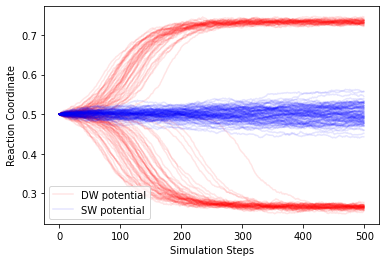

In [19]:
""" We have succesfully created test data for our MLTSA to analyze """
plt.plot(simple_data[0][:,pots.relevant_id,:].T, color="r", label="DW potential", alpha=0.1)
plt.plot(simple_data[0][:,-1,:].T, color="b", label="SW potential", alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()
temp = {k:v for k,v in zip(labels, handles)}
plt.legend(temp.values(), temp.keys(), loc='best');
plt.xlabel("Simulation Steps")
plt.ylabel("Reaction Coordinate")

Now we will generate complex data for our ML model to learn and we will visualize it as previously done. For this we simply call the generate_linear method on the dataset class which will return an array with the simulation data and the labels for each one of them.




In [20]:
n_simulations = 100
n_steps = 500
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)

Generating dataset


Running Simulations: 100%|###########################################################| 100/100 [00:23<00:00,  4.21it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|#######################################################| 100/100 [00:00<?, ?it/s]


Text(0, 0.5, 'Reaction Coordinate')

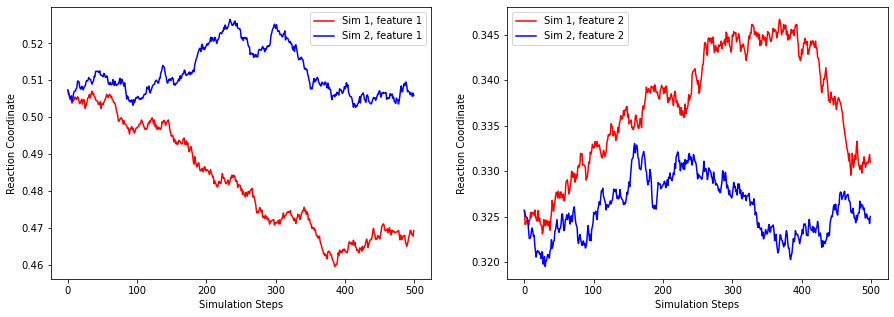

In [21]:
#We proceed to plot the values
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(data[0,0,:], color="r", label="Sim 1, feature 1")
axs[1].plot(data[0,1,:], color="r", label="Sim 1, feature 2")
axs[0].plot(data[1,0,:], color="b", label="Sim 2, feature 1")
axs[1].plot(data[1,1,:], color="b", label="Sim 2, feature 2")
axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("Simulation Steps")
axs[1].set_ylabel("Reaction Coordinate")
axs[0].set_xlabel("Simulation Steps")
axs[0].set_ylabel("Reaction Coordinate")

We see now that the features we plotted are noisy, when we do generate_linear we mixed the original simulation data for each potential (both SW and DW) with different mixing coefficient. We can even trace back which features have been mixed with our "known" relevant DW potential and see how it looks now.

In [22]:
relevant_dists = np.concatenate((np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[1])[0],
                          np.where(pots.relevant_id == np.array(oneD_dataset.combinations).T[0])[0]))
print("Features combined with the relevant DW are:", list(relevant_dists))

Features combined with the relevant DW are: [20, 39, 43, 49, 54, 101, 130, 3, 51, 67, 71, 85, 103, 116, 122, 154]


In [23]:
for feat in relevant_dists:
    print("Feature", feat,"- Potentials involved:",list(oneD_dataset.combinations[feat]))
    summ = np.array(oneD_dataset.mixing_coefs).T[feat][1] + np.array(oneD_dataset.mixing_coefs).T[feat][0]
    print("Pot1:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][0]/summ, decimals=2), "%")
    print("Pot2:", np.around(100 *np.array(oneD_dataset.mixing_coefs).T[feat][1]/summ, decimals=2), "%")

Feature 20 - Potentials involved: [1, 10]
Pot1: 11.09 %
Pot2: 88.91 %
Feature 39 - Potentials involved: [4, 10]
Pot1: 16.28 %
Pot2: 83.72 %
Feature 43 - Potentials involved: [5, 10]
Pot1: 47.3 %
Pot2: 52.7 %
Feature 49 - Potentials involved: [2, 10]
Pot1: 45.23 %
Pot2: 54.77 %
Feature 54 - Potentials involved: [3, 10]
Pot1: 18.36 %
Pot2: 81.64 %
Feature 101 - Potentials involved: [9, 10]
Pot1: 18.5 %
Pot2: 81.5 %
Feature 130 - Potentials involved: [0, 10]
Pot1: 59.46 %
Pot2: 40.54 %
Feature 3 - Potentials involved: [10, 12]
Pot1: 30.66 %
Pot2: 69.34 %
Feature 51 - Potentials involved: [10, 24]
Pot1: 51.42 %
Pot2: 48.58 %
Feature 67 - Potentials involved: [10, 16]
Pot1: 49.53 %
Pot2: 50.47 %
Feature 71 - Potentials involved: [10, 20]
Pot1: 41.71 %
Pot2: 58.29 %
Feature 85 - Potentials involved: [10, 22]
Pot1: 49.21 %
Pot2: 50.79 %
Feature 103 - Potentials involved: [10, 18]
Pot1: 44.09 %
Pot2: 55.91 %
Feature 116 - Potentials involved: [10, 14]
Pot1: 60.76 %
Pot2: 39.24 %
Feature 122 - 

Since we got our simulations classified we can see how the different features look like for each feature, you can try changing the number to see other features:

Text(0.5, 0, '$\\alpha y^{*} + (1-\\alpha)y$')

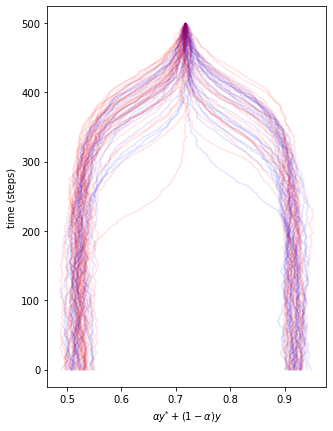

In [24]:
#We can choose which feature to plot here
feature_to_plot = 84
plt.figure(figsize=(5,7))
for dat, answer in zip(data[:,feature_to_plot,:], ans):
    if answer == "IN":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="blue", alpha=0.1)
    elif answer == "OUT":
        plt.plot(list(reversed(dat)), np.arange(0, len(dat)), color="r", alpha=0.1)
plt.ylabel("time (steps)")
plt.xlabel(r'$\alpha y^{*} + (1-\alpha)y$')

Now that we made sure our data is scrambled and it is ready to work with, we will simply format it according to what our ML model needs.

Since we are using an MLP with the number of features as inputs we need to concatenate the frames of the different simulations one after the other in order to get our X. This input data (X) will have the shape of (n_frames, n_features). To get the target values (Y) to fit to, we will have to get the outcome labels (IN/OUT) from the simulations for each corresponding frame,  which will result in a Y with shape (n_frames).

For this task we will use the PrepareData() method on our 1D dataset, this will give us the input data (X) and target values (Y) in an appropriate format to use. Additionally the method allows one to only use a particular range of data instead of the whole length which would be too easy for the ML approach to predict.

In [25]:
time_frame = [30, 60]

X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")

print("Shape of X is:", X.shape)
print("Shape of Y is:", Y.shape)
print("X and Y have the same length:", len(X) == len(Y))

Shape of X is: (3000, 180)
Shape of Y is: (3000,)
X and Y have the same length: True


Our simulation data is ready to be used now, so we will import the necessary functions for applying our MLTSA. First we need the ML algorithm and the MLTSA methods.

This module has full implementation with Scikit-Learn models so we can directly import them.

In [26]:
from MLTSA_sklearn.models import SKL_Train
from sklearn.neural_network import MLPClassifier

Next step is to train the model on data, we use the SKL_Train() function which needs the classifier, X and Y data to fit.
This classifier can be any within the SKlearn suite that uses the .fit() method and the .predict() method.

We can simply call an Multi-Layer Perceptron from SK-learn and tune it as we want. In this case we will set the verbose to True and put a maximum number of iterations so it does not train for too long.
Remember you can do this by hand but we just provided some wrappers to make it easier.

In [27]:
NN = MLPClassifier(random_state=1, verbose=False, max_iter=500) # You can set the verbose to false for less prints.

trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

Accuracy on Train is 91.2
Accuracy on Test set is 91.33333333333333
Trained in  6.1915647983551025 seconds


If you used the default options from this notebook, you should have gotten around 96% accuracy on training and 95% on test without breaking a sweat.

In case you have doubts about the accuracy, we can do a simple validation test generating new data from scratch.

In [28]:
""" Time for Validation with new simulations """

#Generate 25 additional simulations data
data_val, ans_val = oneD_dataset.generate_linear(25, 500)

#Prepare for trial
X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

#Predict the new simulations on the already trained NN
Y_pred = trained_NN.predict(X_val)
val_acc = Y_val == Y_pred
val_acc = np.mean(val_acc)

print("Validation Accuracy is", val_acc*100)

Generating dataset


Running Simulations: 100%|#############################################################| 25/25 [00:06<00:00,  3.88it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|#########################################################| 25/25 [00:00<?, ?it/s]

Validation Accuracy is 89.06666666666668


Once we are happy about the training on our ML model we can move onto trying to detect those correlated features.

For this we simply call the MLTSA() function on the data and the trained model.

In [29]:
from MLTSA_sklearn.MLTSA_sk import MLTSA

#We Call the method on the data, labels and trained NN.
ADrop_train_avg = MLTSA(data[:,:,time_frame[0]:time_frame[1]], ans, trained_NN, drop_mode="Average")


100it [00:07, 13.90it/s]


ADrop means accuracy drop which is what we usually look for when trying to find important distances.

The easiest way to detect those is plotting the values obtained.

(90.62833333333333, 91.47166666666669)

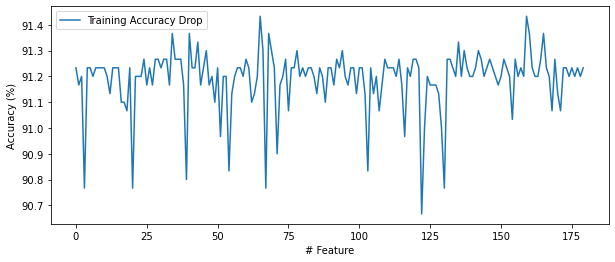

In [30]:
plt.figure(figsize=(10,4))
plt.plot(ADrop_train_avg*100, label="Training Accuracy Drop", color="C0")
plt.legend()
plt.xlabel("# Feature")
plt.ylabel("Accuracy (%)")
plt.ylim()

Now for easier visualization, we included code to plot this to look like the original paper.

This function will plot the MLTSA results in a manner which is easier to interpret and highlight the known to be correlated values to confirm the ML has detected them.

C:\Users\k1802891\Anaconda3\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\k1802891\Anaconda3\lib\site-packages\numpy\core\_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\k1802891\Anaconda3\lib\site-packages\MLTSA_sklearn\MLTSA_sk.py:100: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dat, "-o", color="black", marker="s")


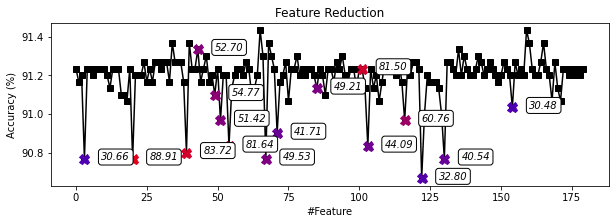

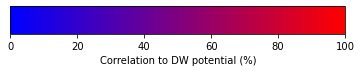

In [31]:
from MLTSA_sklearn.MLTSA_sk import MLTSA_Plot

#We simply get the plot with this
MLTSA_Plot([ADrop_train_avg], oneD_dataset, pots, errorbar=False)

This plots shows the accuracy drop for every single feature after swapping them with their global mean accross simulations. The features highlighted with a coloured cross are correlated features having red as the most correlated (100%) and blue as the least (0%).